# Explore Business Analytics

#### Business Analytics is the process by which businesses use statistical methods and technologies for analyzing historical data in order to gain new insight and improve strategic decision-making.

### Perform 'Exploratory Data Analysis' on the provided dataset 'SampleSuperstore'

EDA is a phenomenon under data analysis used for gaining a better understanding of data aspects like: – main features of data. – variables and relationships that hold between them. – identifying which variables are important for our problem.

In [1]:
# importing all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import requests
import os
import seaborn as sb
import time
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#load in the dataset into a pandas dataframe
loans = pd.read_csv('pro
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
# few rows in dataset
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# number of rows and columns in the dataset
df.shape

(9994, 13)

In [4]:
# statistics of data
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
# basic information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#unique values in the dataset
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

#### Data Assesing and cleaning is done:
This is done by selecting a subset of the data for which analysis will be done. Further cleaning the data like removing the null values as well as duplicated values, then changing the variables to the proper data types for visualizations by using convert data types.

In [7]:
# duplicated values in dataset
sum(df.duplicated())

17

In [8]:
# deleting duplicated values from the dataset
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [9]:
# checking null values in the dataset
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
df.shape

(9977, 13)

#### The rows and columns now in the dataset are 9977 and 13 respectively.

In [11]:
# datatypes of various columns
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [12]:
# converting the column names into lower case for easy analysis process
df.columns = map(str.lower, df.columns)

In [13]:
# renaming columns to remove spaes and hyphen 
df.rename(columns={'ship mode': 'ship_mode', 
                        'postal code': 'postal_code',
                        'sub-category' : 'sub_category'
                       }, inplace=True)

In [14]:
# checking the names of columns
df.sample(1)

,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,sales,quantity,discount,profit
9272,Standard Class,Corporate,United States,New York City,New York,10024,East,Technology,Phones,631.96,4,0.0,303.3408


In [15]:
# converting into category data type
df['postal_code'] = df['postal_code'].astype('category')


#### What is the structure of your dataset?
The rows and columns now in the dataset are 9977 and 13 respectively on which the analysis will be done it includes features like ship_mode,segment,country,city,profit,category and many other variables.

#### What is/are the main feature(s) of interest in your dataset?
The main purposes of this project are to summarize the characteristics of variables that can affect the profit of the retail firm and to get some ideas about the relationships among multiple variables using summary statistics and data visualizations.Further figuring out how sales and other factors like region and category affect the profit.

### Data Visualizations

Data visualization is the discipline of trying to understand data by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed.
In this we use univariate, bivariate and multivariate visualizations.

In [16]:
# assigning colors 
base_color = sb.color_palette()[4]
base_color_1 = sb.color_palette()[7]

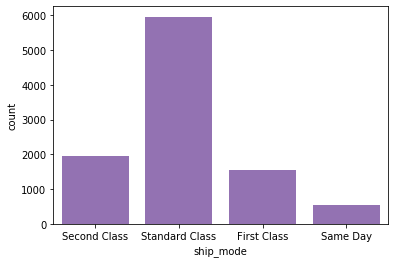

In [17]:
#countplot of ship_mode:
sb.countplot(data = df,x = 'ship_mode',color = base_color);

Maximum Ship Mode is of Standard Class and minimum of Same Day

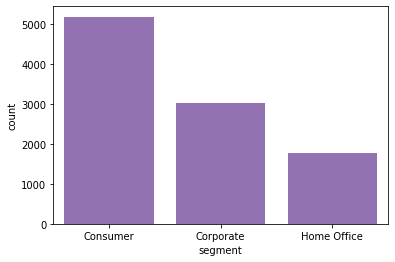

In [18]:
#countplot of segment:
sb.countplot(data = df,x = 'segment',color = base_color);

Maximum Segment is of Consumer and minimum of Home day.

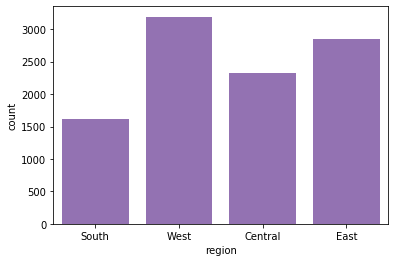

In [19]:
#countplot of region:
sb.countplot(data = df,x = 'region',color = base_color);

Maximum are from West region having a count of more than 3000.

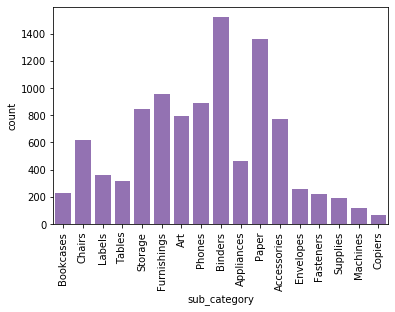

In [23]:
#countplot of sub category:
sb.countplot(data = df,x = 'sub_category',color = base_color)
plt.xticks(rotation =90);

Maximum are from Binders then Paper, least are from Copiers.

In [84]:
t = df['state'].value_counts().head(20)
t_order = t.index

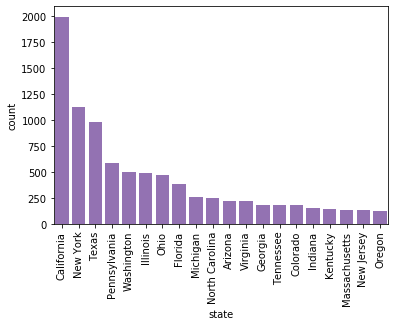

In [85]:
#countplot of state:
sb.countplot(data = df,x = 'state',color = base_color, order = t_order)
plt.xticks(rotation =90);

Maximum number of people are from states of California and New York. 

In [86]:
t4 = df['city'].value_counts().head(20)
t_order = t4.index

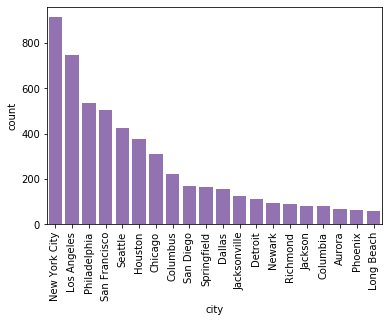

In [87]:
#countplot of term:
sb.countplot(data = df,x = 'city',color = base_color, order = t_order)
plt.xticks(rotation =90);

Further the most number of people belon o the cities of New York City followed by Los Angeles.

In [38]:
df['profit'].describe()

count    9977.00000
mean       28.69013
std       234.45784
min     -6599.97800
25%         1.72620
50%         8.67100
75%        29.37200
max      8399.97600
Name: profit, dtype: float64

In [39]:
bins_2 = np.arange(0,800,10)

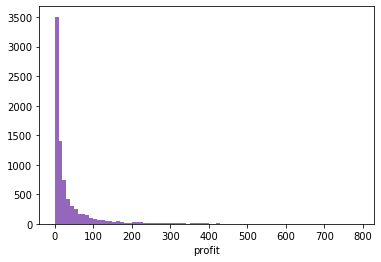

In [40]:
# distribution of profit:
plt.hist(data = df, x = 'profit', bins =bins_2, color = base_color);
plt.xlabel('profit');

Profit mainly lie in the range of 0 to 100.

In [41]:
df['sales'].describe()

count     9977.000000
mean       230.148902
std        623.721409
min          0.444000
25%         17.300000
50%         54.816000
75%        209.970000
max      22638.480000
Name: sales, dtype: float64

In [49]:
bins_3= np.arange(0,3000,100)

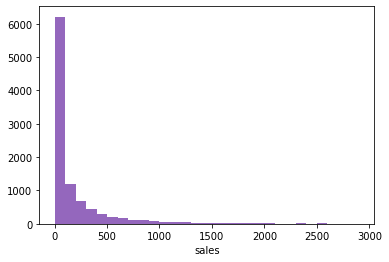

In [50]:
# distribution of sales:
plt.hist(data = df, x='sales',bins = bins_3, color = base_color);
plt.xlabel('sales');

Sales are mainly in range of 0 to 3000.

In [52]:
sorted_counts = df['category'].value_counts()

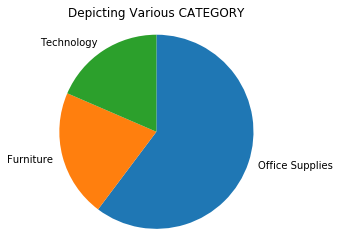

In [93]:
# plotting pie chart for checking the major category:
plt.pie(sorted_counts, labels = sorted_counts.index , startangle = 90,
        counterclock = False)
plt.axis('square')
plt.title('Depicting Various CATEGORY');

The major category is office supplies followed by furniture and technology.

In [54]:
t1 = df['quantity'].value_counts()

In [55]:
t_order = t1.index

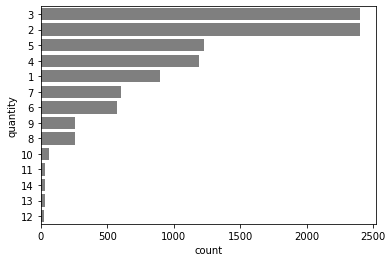

In [57]:
# plotting frequency of quantity:
sb.countplot(data = df, y = 'quantity',color =base_color_1,order = t_order);

Both Quantities 3 and 2 have a frequency more than 2000. Quantities 13 and 12 have the least count

In [59]:
t2 = df['discount'].value_counts().head(10)

In [60]:
t2_order = t2.index

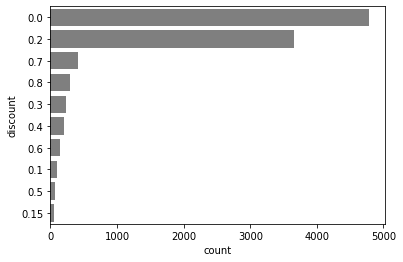

In [88]:
# plotting listing categories:
sb.countplot(data = df, y = 'discount',color =base_color_1,order = t2_order);

Discount of 0.0 followed by 0.2 have major count.

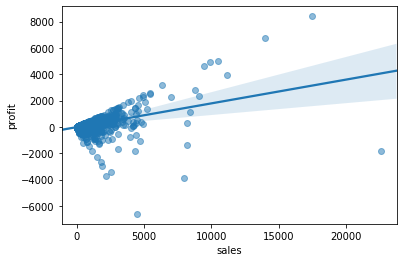

In [66]:
sb.regplot(df['sales'], df['profit'], x_jitter=0.3, scatter_kws={'alpha':1/2});

From the above plot we can say that profit increases with the number of sales.

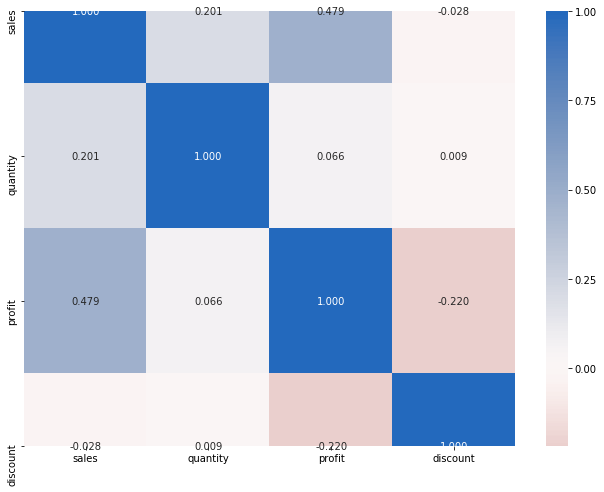

In [69]:
# I want to look at the pairwise correlations present between features in the data
numeric_vars_1 = ['sales','quantity','profit','discount']
plt.figure(figsize = [11, 8])
sb.heatmap(df[numeric_vars_1].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

The correlation coefficient of Profit with sales and quantity is positive 0.479 and 0.066 respectively.
Further,profit and discount are negatively correlated.
Discount is negatively correlated with sales.There is no string correlation between the variables of this data set.

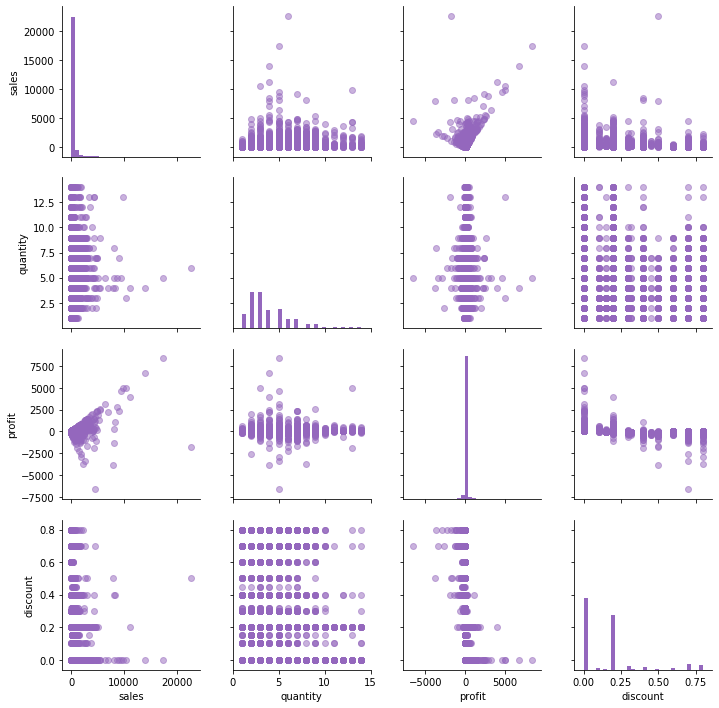

In [73]:
g = sb.PairGrid(data = df, vars = numeric_vars_1)
g = g.map_diag(plt.hist, bins=30,color = base_color)
g.map_offdiag(plt.scatter, alpha=0.5,color=base_color);


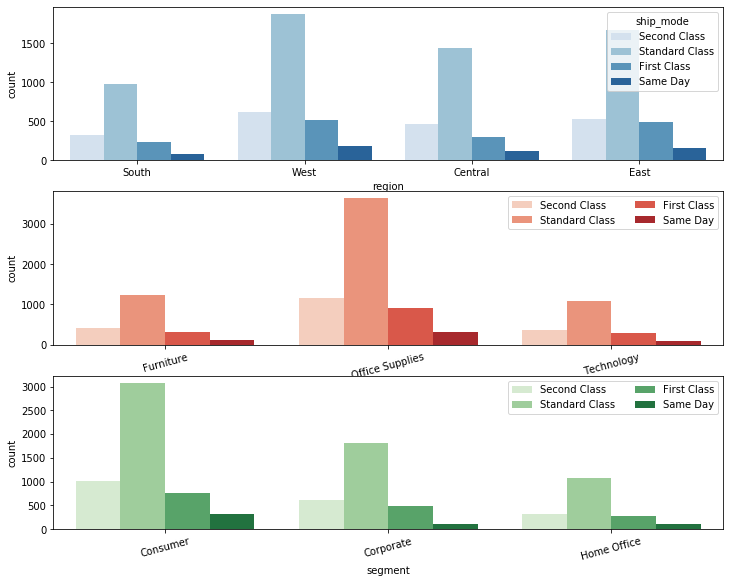

In [74]:
plt.figure(figsize = [12, 13])

# subplot 1: Region vs Ship Mode
plt.subplot(4, 1, 1)
sb.countplot(data = df, x = 'region', hue = 'ship_mode', palette = 'Blues')

# subplot 2: Category vs Ship mode
ax = plt.subplot(4, 1, 2)
sb.countplot(data = df, x = 'category', hue = 'ship_mode', palette = 'Reds')
plt.xticks(rotation = 15)
ax.legend(ncol = 2)


# subplot 3:Segment vs Ship mode
ax = plt.subplot(4, 1, 3)
sb.countplot(data = df, x ='segment', hue = 'ship_mode', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation = 15);

From the above visualization we can depict that West region followed by East region have maximum ship mode of Standard class.
Further, we can see that Category office supplies also have ship mode of Standard class followed by Second class.
From the last graph we can depict that segment of Consumer as well as Corporate have ship ship mode of Standard class and least of Same day. 

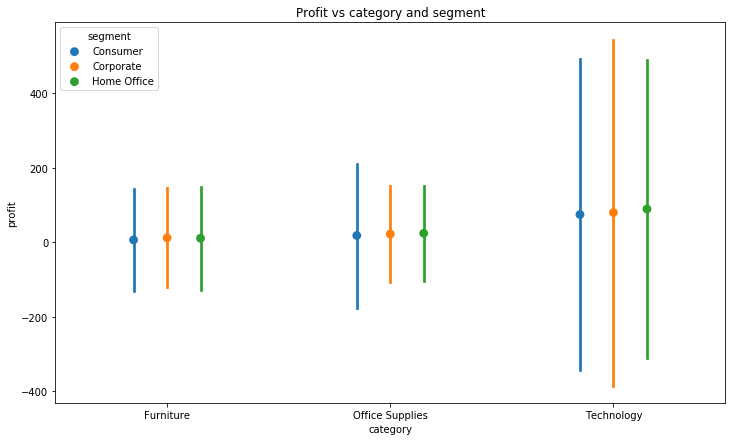

In [76]:
plt.figure(figsize = [12, 7])
ax = sb.pointplot(data = df, x = 'category', y = 'profit', hue = 'segment',dodge = 0.3, linestyles = "",ci ='sd')
plt.title('Profit vs category and segment')
plt.ylabel('profit');

From the above visualization we can depict that Profit of technology category with corporate segment is high compared to the office supplies category with corporate segment.

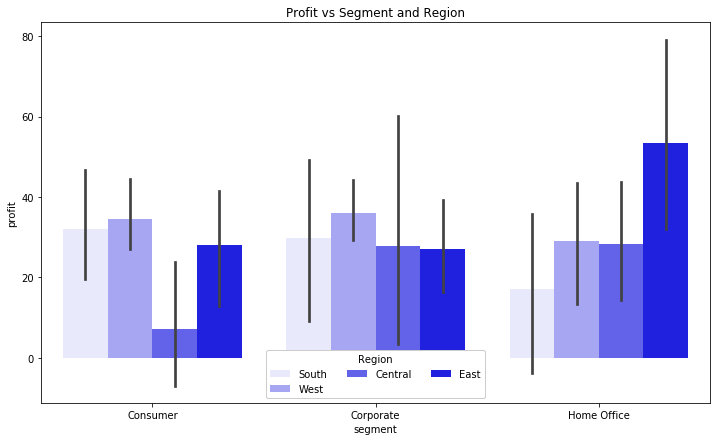

In [80]:
plt.figure(figsize = [12, 7])
ax = sb.barplot(data =df, x= 'segment' , y= 'profit', hue = 'region', color = 'b')
ax.legend(loc =8,ncol =3 , framealpha =1, title = 'Region')
plt.title('Profit vs Segment and Region');

From the above bar plot we can say that Home office segment has high profit mainly from the East region followed by Corporate segment with West region.